In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("hijest/genre-classification-dataset-imdb")

print("Path to dataset files:", path)


C:\Users\user1\anaconda3\envs\miniproject\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


100%|██████████████████████████████████████████████████████████████████████████████| 41.7M/41.7M [01:03<00:00, 692kB/s]

Extracting files...


Path to dataset files: C:\Users\user1\.cache\kagglehub\datasets\hijest\genre-classification-dataset-imdb\versions\1


In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression

In [7]:
import os

path = r"C:\Users\user1\.cache\kagglehub\datasets\hijest\genre-classification-dataset-imdb\versions\1"
print(os.listdir(path))
import os

path = r"C:\Users\user1\.cache\kagglehub\datasets\hijest\genre-classification-dataset-imdb\versions\1\Genre Classification Dataset"
print(os.listdir(path))


['Genre Classification Dataset']
['description.txt', 'test_data.txt', 'test_data_solution.txt', 'train_data.txt']


In [9]:
import pandas as pd
import os

path = r"C:\Users\user1\.cache\kagglehub\datasets\hijest\genre-classification-dataset-imdb\versions\1\Genre Classification Dataset"

# Load data
df_train = pd.read_csv(os.path.join(path, "train_data.txt"), sep=":::", header=0, engine="python")
df_test = pd.read_csv(os.path.join(path, "test_data.txt"), sep=":::", header=0, engine="python")

# Rename columns
df_train.columns = ['SN', 'movie_name', 'category', 'confession']
df_test.columns = ['SN', 'movie_name', 'confession']

print(df_train.head())
print(df_test.head())
print(df_train.info())


   SN                          movie_name       category  \
0   2                       Cupid (1997)       thriller    
1   3   Young, Wild and Wonderful (1980)          adult    
2   4              The Secret Sin (1915)          drama    
3   5             The Unrecovered (2007)          drama    
4   6             Quality Control (2011)    documentary    

                                          confession  
0   A brother and sister with a past incestuous r...  
1   As the bus empties the students for their fie...  
2   To help their unemployed father make ends mee...  
3   The film's title refers not only to the un-re...  
4   Quality Control consists of a series of 16mm ...  
   SN                     movie_name  \
0   2      La guerra de papá (1977)    
1   3   Off the Beaten Track (2010)    
2   4        Meu Amigo Hindu (2015)    
3   5             Er nu zhai (1955)    
4   6            Riddle Room (2016)    

                                          confession  
0   Spain, Ma

In [11]:
df_train.describe()

,SN
count,54213.000000
mean,27108.000000
std,15650.089409
min,2.000000
25%,13555.000000
50%,27108.000000
75%,40661.000000
max,54214.000000


In [13]:
df_test.describe()

,SN
count,54199.000000
mean,27101.000000
std,15646.047957
min,2.000000
25%,13551.500000
50%,27101.000000
75%,40650.500000
max,54200.000000


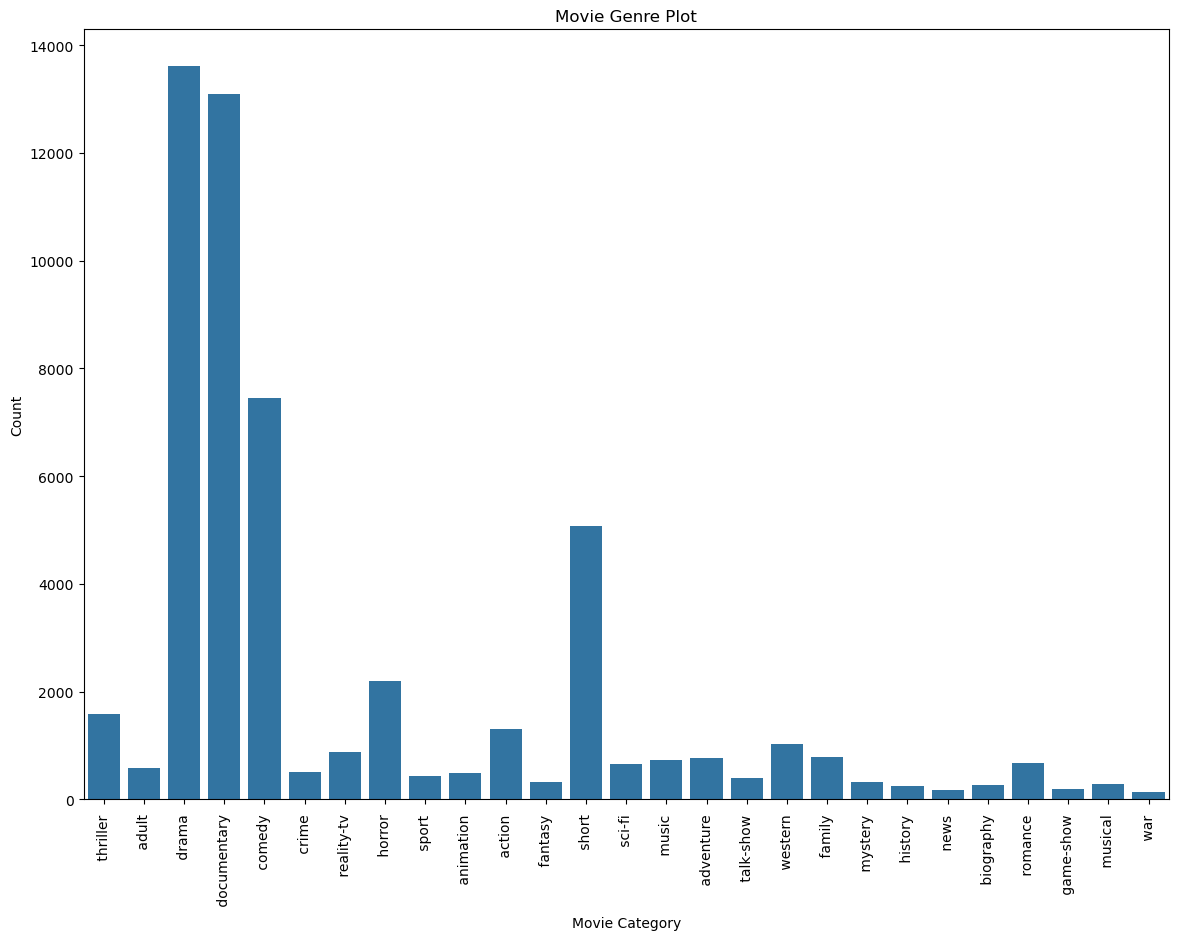

In [15]:
plt.figure(figsize=(14,10))
sns.countplot(x='category', data=df_train)
plt.xlabel('Movie Category')
plt.ylabel('Count')
plt.title('Movie Genre Plot')
plt.xticks(rotation=90);
plt.show()

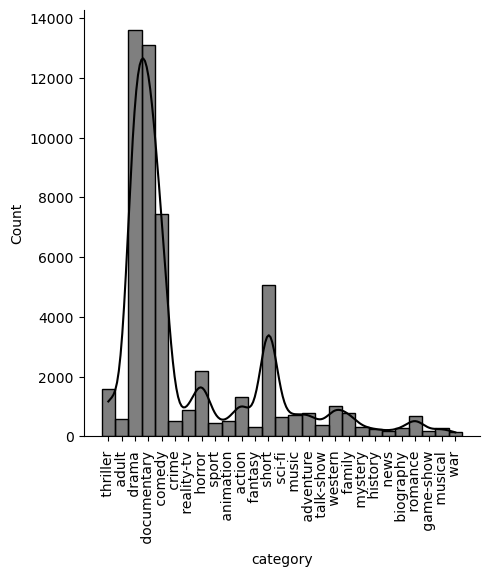

In [17]:
sns.displot(df_train.category, kde =True, color = "black")
plt.xticks(rotation=90);

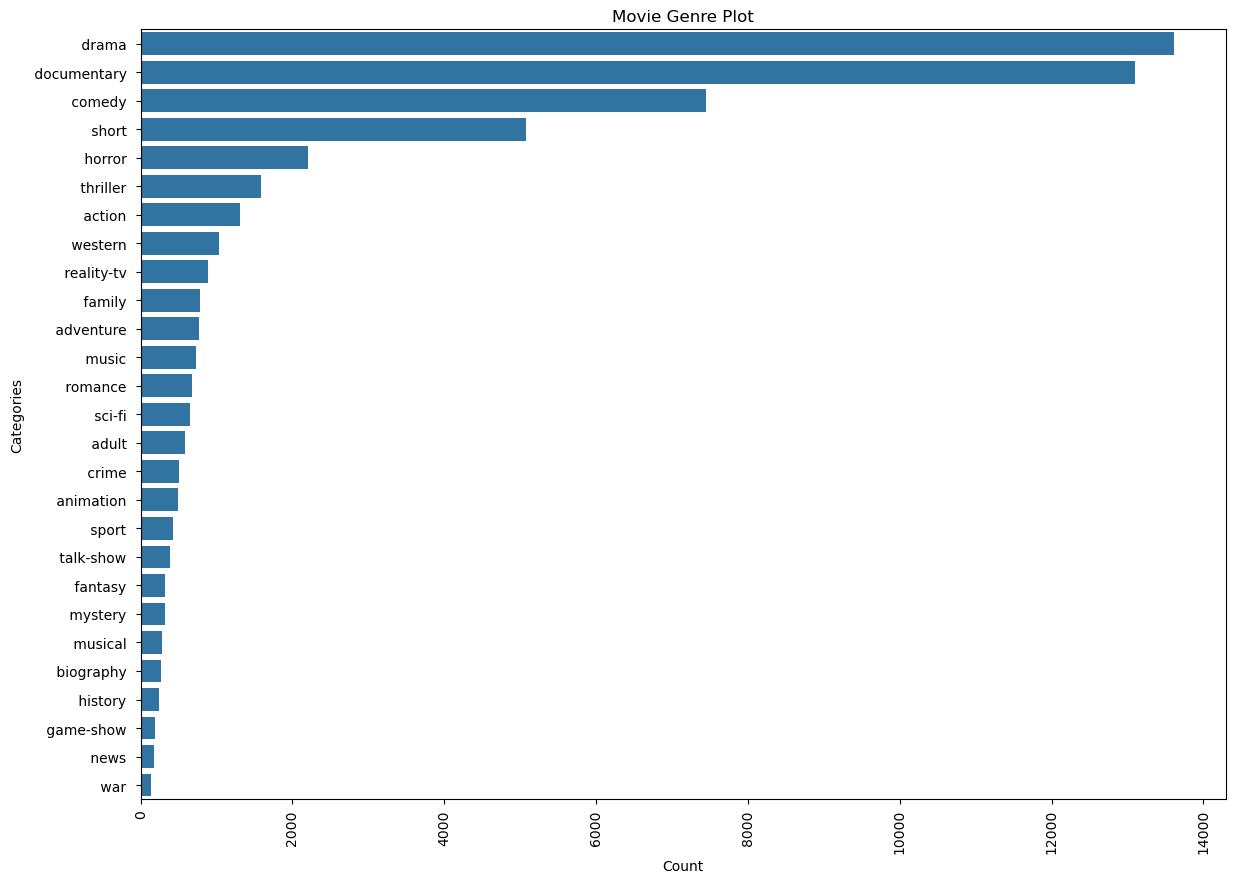

In [19]:
plt.figure(figsize = (14,10))
count1 = df_train.category.value_counts()
sns.barplot(x = count1, y = count1.index, orient = 'h')
plt.xlabel('Count')
plt.ylabel('Categories')
plt.title('Movie Genre Plot')
plt.xticks(rotation=90)
plt.show()

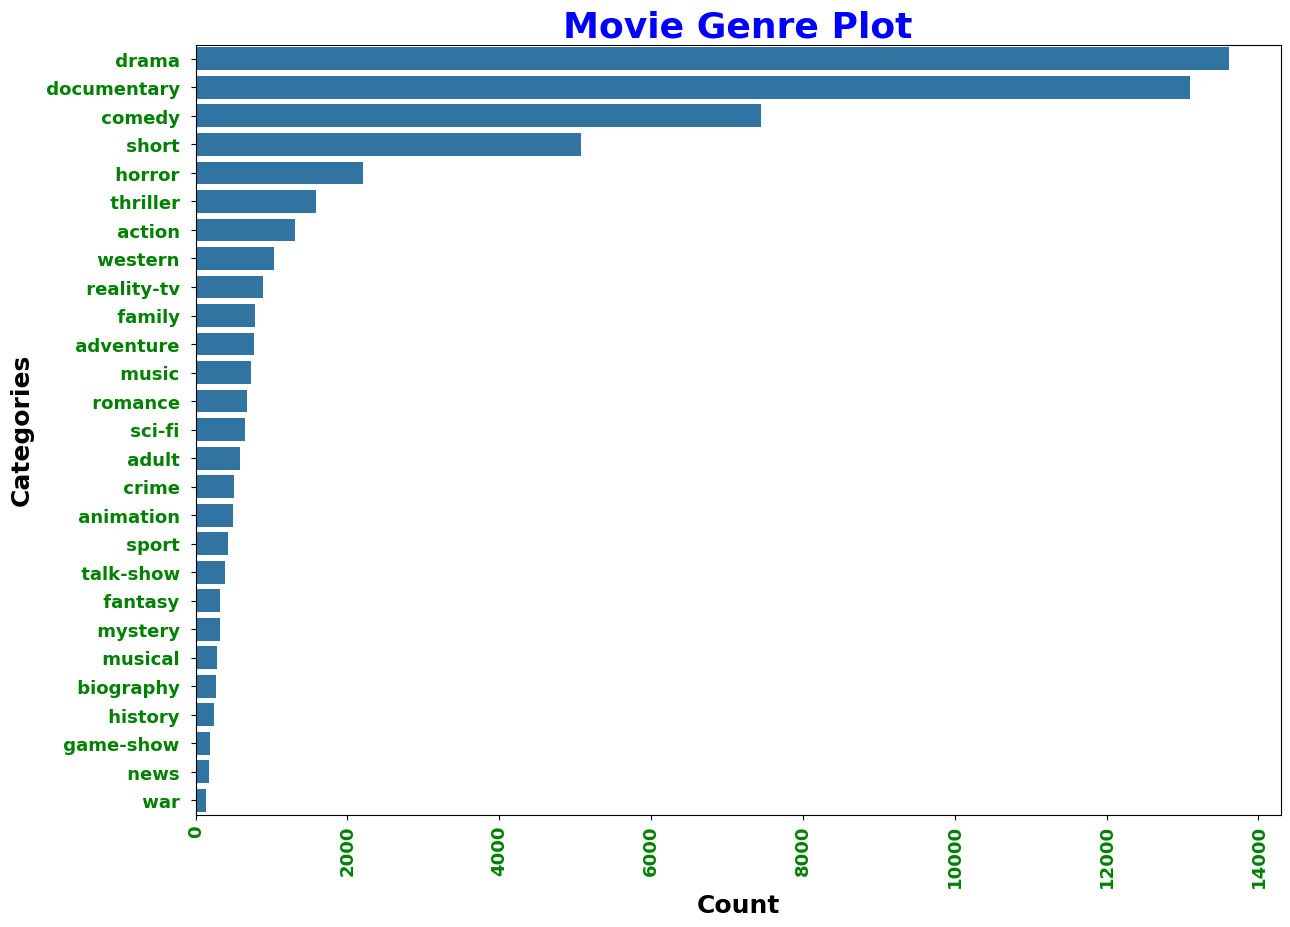

In [21]:
plt.figure(figsize = (14,10))
count1 = df_train.category.value_counts()
sns.barplot(x = count1, y = count1.index, orient = 'h')
plt.xlabel('Count', fontsize = 18, fontweight = 'bold')
plt.ylabel('Categories', fontsize = 18, fontweight = 'bold')
plt.title('Movie Genre Plot', fontsize = 26, fontweight = 'bold', color = 'blue')
plt.xticks(rotation=90, fontsize = 13, fontweight = 'bold', color = 'green')
plt.yticks(fontsize = 13, fontweight = 'bold', color = 'green')
plt.show()

In [23]:
df_combined = pd.concat([df_train, df_test], axis = 0)

In [25]:
df_combined.head()

,SN,movie_name,category,confession
0,2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
1,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
2,4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
3,5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...
4,6,Quality Control (2011),documentary,Quality Control consists of a series of 16mm ...


In [27]:
df_combined.shape

(108412, 4)

In [29]:
df_combined.size

433648

In [31]:
df_combined.isnull().any()

SN            False
movie_name    False
category       True
confession    False
dtype: bool

In [33]:
df_combined.count()

SN            108412
movie_name    108412
category       54213
confession    108412
dtype: int64

In [35]:
encoder = LabelEncoder()
df_combined["category"] = encoder.fit_transform(df_combined["category"].values)

In [37]:
encoder = LabelEncoder()
df_combined["movie_name"] = encoder.fit_transform(df_combined["movie_name"].values)

In [39]:
df_combined.head()

,SN,movie_name,category,confession
0,2,31219,24,A brother and sister with a past incestuous r...
1,3,107506,1,As the bus empties the students for their fie...
2,4,96119,8,To help their unemployed father make ends mee...
3,5,97557,8,The film's title refers not only to the un-re...
4,6,74516,7,Quality Control consists of a series of 16mm ...


In [41]:
df_combined.category = df_combined.category.fillna(df_combined.category.mean())
df_combined.count()

SN            108412
movie_name    108412
category      108412
confession    108412
dtype: int64

In [43]:
df_combined.duplicated().values.any()

np.False_

In [45]:
vectorizer = TfidfVectorizer()

In [47]:
X = vectorizer.fit_transform(df_combined["confession"])

In [49]:
df_combined.head()

,SN,movie_name,category,confession
0,2,31219,24,A brother and sister with a past incestuous r...
1,3,107506,1,As the bus empties the students for their fie...
2,4,96119,8,To help their unemployed father make ends mee...
3,5,97557,8,The film's title refers not only to the un-re...
4,6,74516,7,Quality Control consists of a series of 16mm ...


In [51]:
y = df_combined["category"]

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [55]:
naive_bayes_model = MultinomialNB()

In [57]:
naive_bayes_model.fit(X_train, y_train)

MultinomialNB()

In [59]:
nb_predictions = naive_bayes_model.predict(X_test)

In [61]:
print("Naive Bayes Model:")
print(confusion_matrix(y_test, nb_predictions))
print(classification_report(y_test, nb_predictions))
print("Accuracy: ", accuracy_score(y_test, nb_predictions))
print("r2_Score: ", r2_score(y_test, nb_predictions))

Naive Bayes Model:
[[    0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0   256]
 [    0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0   127]
 [    0     0     0     0     0     1     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0   145]
 [    0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0    91]
 [    0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0    42]
 [    0     0     0     0     0    18     0     0     1     0     0     0
      0     0     0     0     0 

C:\Users\user1\anaconda3\envs\miniproject\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\user1\anaconda3\envs\miniproject\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\user1\anaconda3\envs\miniproject\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", le